# Câncer de mama

O câncer de mama é o mais incidente em mulheres no mundo, com aproximadamente 2,3 milhões de mulheres diagnosticadas com câncer de mama e 685 mil mortes em todo o mundo. No final de 2020, teve 7,8 milhões de mulheres vivas diagnosticadas com câncer de mama nos últimos 5 anos, tornando-o o câncer mais prevalente do mundo.

No **Brasil**, o câncer de mama é também o tipo de câncer mais incidente em mulheres de todas as regiões, após o câncer de pele não melanoma. As taxas são mais elevadas nas regiões mais desenvolvidas (Sul e Sudeste) e a menor é observada na região Norte. Em 2022, estima-se que ocorrerão 66.280 casos novos da doença (INCA, 2020).

O câncer de mama é também a [primeira causa de morte por câncer em mulheres no Brasil](https://www.inca.gov.br/controle-do-cancer-de-mama/dados-e-numeros/mortalidade#:~:text=O%20c%C3%A2ncer%20de%20mama%20%C3%A9,do%20%C3%BAtero%20ocupa%20essa%20posi%C3%A7%C3%A3o.). A incidência e a mortalidade por câncer de mama tendem a crescer progressivamente a partir dos 40 anos (INCA, 2019).

<center><img src="https://www.camarabracodotrombudo.sc.gov.br/media/noticia/outubro-rosa-o-mes-esta-terminando-mas-a-campanha-nao-35.jpg" height="100px" width="300px"></center>


**Outubro rosa** é um movimento que é celebrado anualmente desde os anos 90. O objetivo da campanha é compartilhar informações sobre o câncer de mama, promovendo a conscientização sobre a doença, proporcionando maior acesso aos serviços de diagnóstico e contribuindo para a redução da mortalidade.

O que eu trago neste artigo é que atráves dos preditores é possível de identificar a presença do cancêr de mama. É uma pequena contribuição que visa ajudar a entender a extensão desse problema no mundo, além de incentivar o Outubro Rosa dentro da comunidade Python e Data Science.

### Referências

INSTITUTO NACIONAL DE CÂNCER JOSÉ ALENCAR GOMES DA SILVA. **Atlas da mortalidade**. Rio de Janeiro: INCA, 2021. base de dados. Disponível em: https://www.inca.gov.br/app/mortalidade Acesso em: 12 jun 2022.

INTERNATIONAL AGENCY FOR RESEARCH ON CANCER. **Cancer today**. Lyon: WHO, 2020. Disponível em: https://gco.iarc.fr/today/home Acesso em: 12 jun 2022.

## Descrição dos dados sobre o câncer de mama

O conjunto de dados (dataset) do câncer de mama que eu escolhi está hospedado na [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra), e traz informações sobre os preditores. Existem 10 preditores, todos quantitativos, e uma variável dependente binária, indicando a presença ou ausência de câncer de mama. Os **preditores** são dados e parâmetros antropométricos que podem ser coletados em análises rotineiras de sangue.

### Importações dos pacotes necessários

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [156]:
# importar os dados sobre câncer para um DataFrame
dados = pd.read_csv("dataR2.csv")

### Exibição do DataFrame

In [157]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", dados.shape)

# visualizar os 5 primeiros dados
dados.head()

Formato do DataFrame:  (116, 10)


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### Traduzindo as colunas

In [158]:
dados.rename(columns={
    'Age': 'idade',
    'BMI': 'imc',
    'Glucose': 'glicose',
    'Insulin': 'insulina',
    'HOMA': 'homa',
    'Leptin': 'leptina',
    'Adiponectin': 'adiponectina',
    'Resistin': 'resistina',
    'MCP.1': 'mcp1',
    'Classification': 'classificacao'
}, inplace=True)

## Dicionário de Variáveis
Esse arquivo *csv* possui 10 colunas. Sendo elas:
* **Idade**: faixa etária de 20 a 89 anos;
* **IMC**: é um parâmetro utilizado para avaliar se o peso está dentro do valor ideal para a altura. (kg/m2);
* **Glicose**: é um carboidrato considerado uma das principais fontes de energia. (mg/dL);
* **Insulina**: é um hormônio produzido pelo pâncreas, e tem como função metabolizar a glicose (açúcar no sangue) para produção de energia. (µU/mL);
* **HOMA**: é um método utilizado para quantificar a resistência à insulina e a função das células beta do pâncreas;
* **Leptina**: é um petídeo que desempenha importante papel na regulação da ingestão alimentar e no gasto energético. (ng/mL);
* **Adiponectina**: é uma proteína gene ADIPO. (µg/mL);
* **Resistina**: hormônio produzido pelo tecido adiposo. (ng/mL);
* **MCP-1**: é uma citocina quimiotática de baixo peso molecular. (pg/ dL).
* **Classificação**:
  * 1 = Controles saudáveis
  * 2 = Paciente

### Simbolos
* **kg**: quilograma;
* **m2**: metro ao quadrado;
* **mg**: miligrama;
* **dL**: decilitro;
* **µU**: unidade Internacional;
* **ml**: mililitro;
* **μg**: micograma;
* **ng**: nanograma;
* **pg**: picograma.

### Visualização

In [159]:
# visualizar os 5 primeiros dados
dados.head()

,idade,imc,glicose,insulina,homa,leptina,adiponectina,resistina,mcp1,classificacao
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### Informações do DataFrame

In [160]:
# exibir as informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          116 non-null    int64  
 1   imc            116 non-null    float64
 2   glicose        116 non-null    int64  
 3   insulina       116 non-null    float64
 4   homa           116 non-null    float64
 5   leptina        116 non-null    float64
 6   adiponectina   116 non-null    float64
 7   resistina      116 non-null    float64
 8   mcp1           116 non-null    float64
 9   classificacao  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


### Descrição

In [161]:
# visualizar a descrição
dados.describe()

,idade,imc,glicose,insulina,homa,leptina,adiponectina,resistina,mcp1,classificacao
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


### Verificando se há valores nulos

In [162]:
# verificar se há valores nulos (inexistentes) nos dados
dados.isnull().sum()

idade            0
imc              0
glicose          0
insulina         0
homa             0
leptina          0
adiponectina     0
resistina        0
mcp1             0
classificacao    0
dtype: int64

### Exibição do gráfico de diagnosticado e não diagnosticado

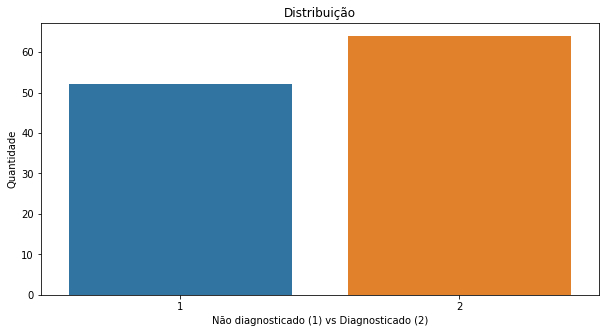

In [163]:
plt.figure(figsize=(10, 5))

sns.countplot(data=dados, x='classificacao')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.xlabel('Não diagnosticado (1) vs Diagnosticado (2)')
plt.title('Distribuição');

### Idade dos pacientes

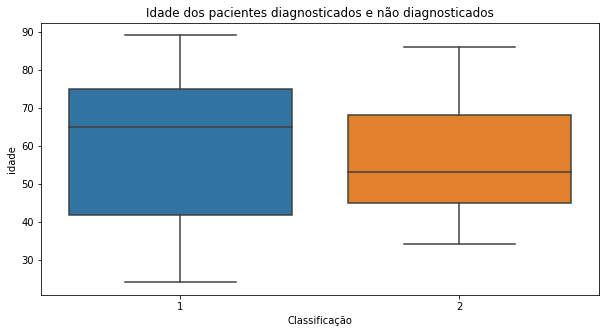

In [173]:
# alterando o tamanho da figura
plt.figure(figsize=(10, 5))

# gerando o boxplot
sns.boxplot(data=dados, x='classificacao', y='idade')
plt.xlabel('Classificação')
plt.title('Idade dos pacientes diagnosticados e não diagnosticados');

### Gráfico normalizado da glicose

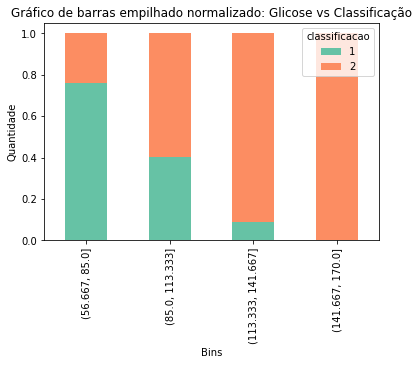

In [177]:
# color palette
pal = sns.color_palette("Set2")

# alterando o tamanho do bins para 10
bins = np.linspace(0,170,7)

# criando nova coluna em dados com categorias bin por recurso
dados['glicose_intervalo'] = pd.cut(dados['glicose'], bins)

# criando uma variável de gráfico de barras empilhadas de crosstab
chart = pd.crosstab(dados['glicose_intervalo'],dados['classificacao'])

# gráfico de normalização e gráfico de plotagem
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar', color = pal,stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantidade')
plt.title('Gráfico de barras empilhado normalizado: Glicose vs Classificação');

A porcentagem de pacientes com câncer aumenta de acordo com o nível de glicose no sangue. Essa mudança está perceptivel se compararmos a primeira barra com a última barra. Se olharmos para última barra vermos que o intervalo do nível de glicose de **141 a 170** mostra que **100%** dos pacientes que se encontram nessa categoria estão com câncer, sendo diferente da primeira barra que mostra uma presença de apenas **22%** dos pacientes com câncer.

# Testando o modelo
Dividindo os dados de amostra em treinamento e teste para testar os resultados de regressão.

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# redefinindo colunas
X= dados[['imc', 'glicose', 'insulina', 'homa', 'leptina', 'adiponectina', 'resistina', 'mcp1']]
y = dados['classificacao']

# dividindo em treinamento(70%) e teste(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# executando nova regressão nos dados de treinamento
LR = LinearRegression()
LR.fit(X_train, y_train)

# calculando a precisão do modelo de treinamento
accuracy = logreg.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%');

The accuracy is: 62.857142857142854%
